<a href="https://colab.research.google.com/github/AltoTenor/Rare-Event-Classification/blob/main/Finalv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Preprocessing and dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Train-test split and resampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    average_precision_score
)

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import TomekLinks

from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec



## Data Preprocessing

### Reading CSV and setting **time** to index

In [ ]:
# Reading the CSV File
df = pd.read_csv('Rare_Event_Classification_Data.csv')
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [ ]:
df['time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18398 entries, 0 to 18397
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
18398 non-null  object
dtypes: object(1)
memory usage: 143.9+ KB


We see that time column is an object and not a datetime value. Hence we will be converting it to DateTime datatype and setting it as an index.


In [ ]:
# Making time the index
df['time'] = pd.to_datetime(df['time'], format='%m/%d/%y %H:%M')
df.set_index('time', inplace=True)
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
time,,,,,,,,,,,,,,,,,,,,,
1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


### Train-Test Data Split

In [ ]:
# Seperating the features from the target variable
X = df.drop('y', axis=1)
y = df[['y']]

# Splitting
X_train = X[:"21-05-1999"]
y_train = y[:"21-05-1999"]
X_test = X["21-05-1999":]
y_test = y["21-05-1999":]

print("Train: ",y_train.value_counts())
print("Test: ",y_test.value_counts())

train_set = pd.merge(X_train, y_train, left_index=True, right_index=True, how='inner')

# train_set.describe()

Train:  y
0    13531
1       86
Name: count, dtype: int64
Test:  y
0    5413
1      40
Name: count, dtype: int64


In [ ]:
X_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
count,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,...,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000,13617.000000
mean,0.028811,-0.197916,1.080803,-37.003513,-0.094052,1.290220,0.018291,-0.011864,-0.005080,-0.005865,...,1.453652,0.641705,-0.037768,-3.305059,23.394867,0.778746,-0.004241,0.691946,0.002315,0.001102
std,0.674411,5.079822,6.082696,134.943150,0.618793,35.939104,0.107944,0.065030,0.156457,0.102533,...,6.516086,5.013007,3.130544,72.263805,83.622761,2.402041,0.056020,6.435906,0.004349,0.033173
min,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,-0.098310,...,-16.555008,-14.211369,-5.370937,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.006588,0.000000
25%,-0.477390,-3.121841,-3.599675,-136.051950,-0.512980,-28.216224,-0.049319,-0.051043,-0.059966,-0.048260,...,-3.921707,-2.952824,-4.860574,-45.766049,-42.985846,-1.470630,0.003692,0.292719,-0.001174,0.000000
50%,0.146287,-0.556090,0.193796,-61.537225,-0.213755,9.532814,0.010803,-0.021135,-0.030057,-0.018352,...,1.210373,1.231258,0.652025,10.113834,23.123285,1.337108,0.016717,0.792322,0.001953,0.000000
75%,0.455319,1.748973,4.232596,48.941536,0.154607,29.418312,0.070619,0.028915,-0.000149,0.003366,...,7.792648,4.532772,2.631391,41.664859,78.998285,2.847789,0.022795,1.345537,0.005476,0.000000
max,2.517970,16.734899,15.900116,296.772589,4.239385,68.886910,1.705590,0.788826,3.206675,2.921802,...,14.180588,11.148006,6.054363,287.252017,252.147455,6.922008,0.060264,5.756678,0.020510,1.000000


### Preliminary Checks - EDA

#### Degree of Imbalance

In [ ]:
print(f"The total number of records provided are {y_train.shape[0]}."
f"\nThe number of records with the rare event occuring i.e. y = 1 is {y_train[y_train['y']==1].shape[0]}."
f"\nThe degree of imbalance is hence {y_train[y_train['y']==1].shape[0]*100/y_train.shape[0]}%.")


The total number of records provided are 13617.
The number of records with the rare event occuring i.e. y = 1 is 86.
The degree of imbalance is hence 0.6315634868179482%.


| Percentage of Data Belonging to Minority Class | Degree of Imbalance |
|------------------------------------------------|---------------------|
| 20-40% of the Dataset                          | Mild                |
| 1-20% of the Dataset                           | Moderate            |
| <1% of the Dataset                             | Extreme             |

 [Source: Google - Imbalanced datasets](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)

#### Checking for any missing values

In [ ]:
print( f"Sum of count of N/A values in each column: {df.isna().sum().unique()}")

Sum of count of N/A values in each column: [0]


#### Checking for any duplicated rows

In [ ]:
print( f"The number of duplicated rows in Feature Set are: {X_train[X_train.duplicated()].shape[0]}")

The number of duplicated rows in Feature Set are: 0


#### Plotting Distribution of the Rare Event wrt Time

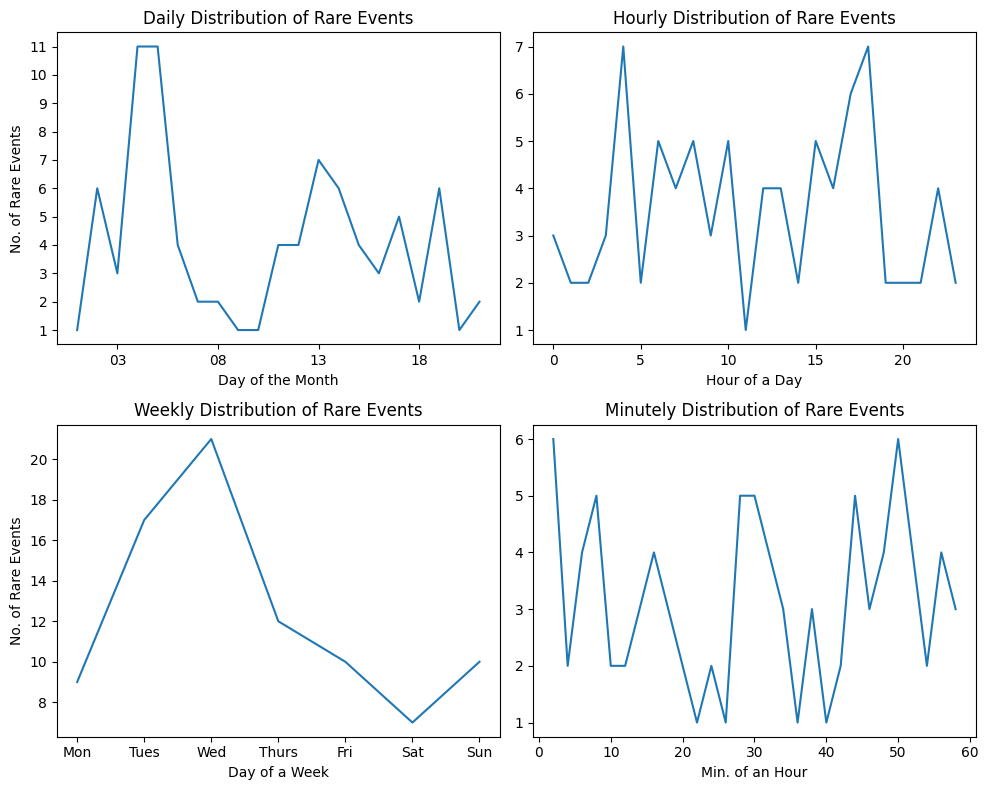

In [ ]:
# Histogram to check the Daily Distribution of Rare Events

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter,DayLocator
from matplotlib.ticker import MultipleLocator

fig= plt.figure(figsize=(10,8))
ax = plt.subplot(2,2,1)
rare_event_dates = train_set[train_set['y']==1]

rare_event_dates_c = rare_event_dates.copy()
rare_event_dates_c['day'] = rare_event_dates_c.index.date
rare_event_dates_c = rare_event_dates_c.groupby('day',as_index=False).agg(freq=('y','sum'))


ax.plot(rare_event_dates_c['day'], rare_event_dates_c['freq'])

ax.xaxis.set_major_formatter(DateFormatter('%d'))
ax.xaxis.set_major_locator(DayLocator(interval=5))
ax.yaxis.set_major_locator(MultipleLocator(1))

# ax.set_xlabel('Daily Distribution: May 1999')
ax.set_ylabel('No. of Rare Events')
ax.set_xlabel('Day of the Month')
ax.set_title('Daily Distribution of Rare Events');

ax2 = plt.subplot(2,2,2)
ax2.set_title('Hourly Distribution of Rare Events');

rare_event_dates_2 = rare_event_dates.copy()
# Now assign the hour column safely
rare_event_dates_2['hour'] = rare_event_dates_2.index.hour
rare_event_dates_2 = rare_event_dates_2.groupby('hour',as_index=False).agg(freq=('y','sum'))
ax2.set_xlabel('Hour of a Day')

ax2.plot(rare_event_dates_2['hour'],rare_event_dates_2['freq'])

ax3 = plt.subplot(2,2,3)
ax3.set_title('Weekly Distribution of Rare Events');
ax3.set_ylabel('No. of Rare Events')
ax3.set_xlabel('Day of a Week')
ax3.set_xticklabels(['_','Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

rare_event_dates_3 = rare_event_dates.copy()
# Now assign the hour column safely
rare_event_dates_3['dayOfWeek'] = rare_event_dates_3.index.dayofweek
rare_event_dates_3 = rare_event_dates_3.groupby('dayOfWeek',as_index=False).agg(freq=('y','sum'))

ax3.plot(rare_event_dates_3['dayOfWeek'],rare_event_dates_3['freq'])

ax4 = plt.subplot(2,2,4)
ax4.set_title('Minutely Distribution of Rare Events');
ax4.set_xlabel('Min. of an Hour')

rare_event_dates_4 = rare_event_dates.copy()
# Now assign the hour column safely
rare_event_dates_4['minute'] = rare_event_dates_4.index.minute
rare_event_dates_4 = rare_event_dates_4.groupby('minute',as_index=False).agg(freq=('y','sum'))

ax4.plot(rare_event_dates_4['minute'],rare_event_dates_4['freq']);

fig.tight_layout()

#### Histograms to show distribution of each attribute xi for positive samples

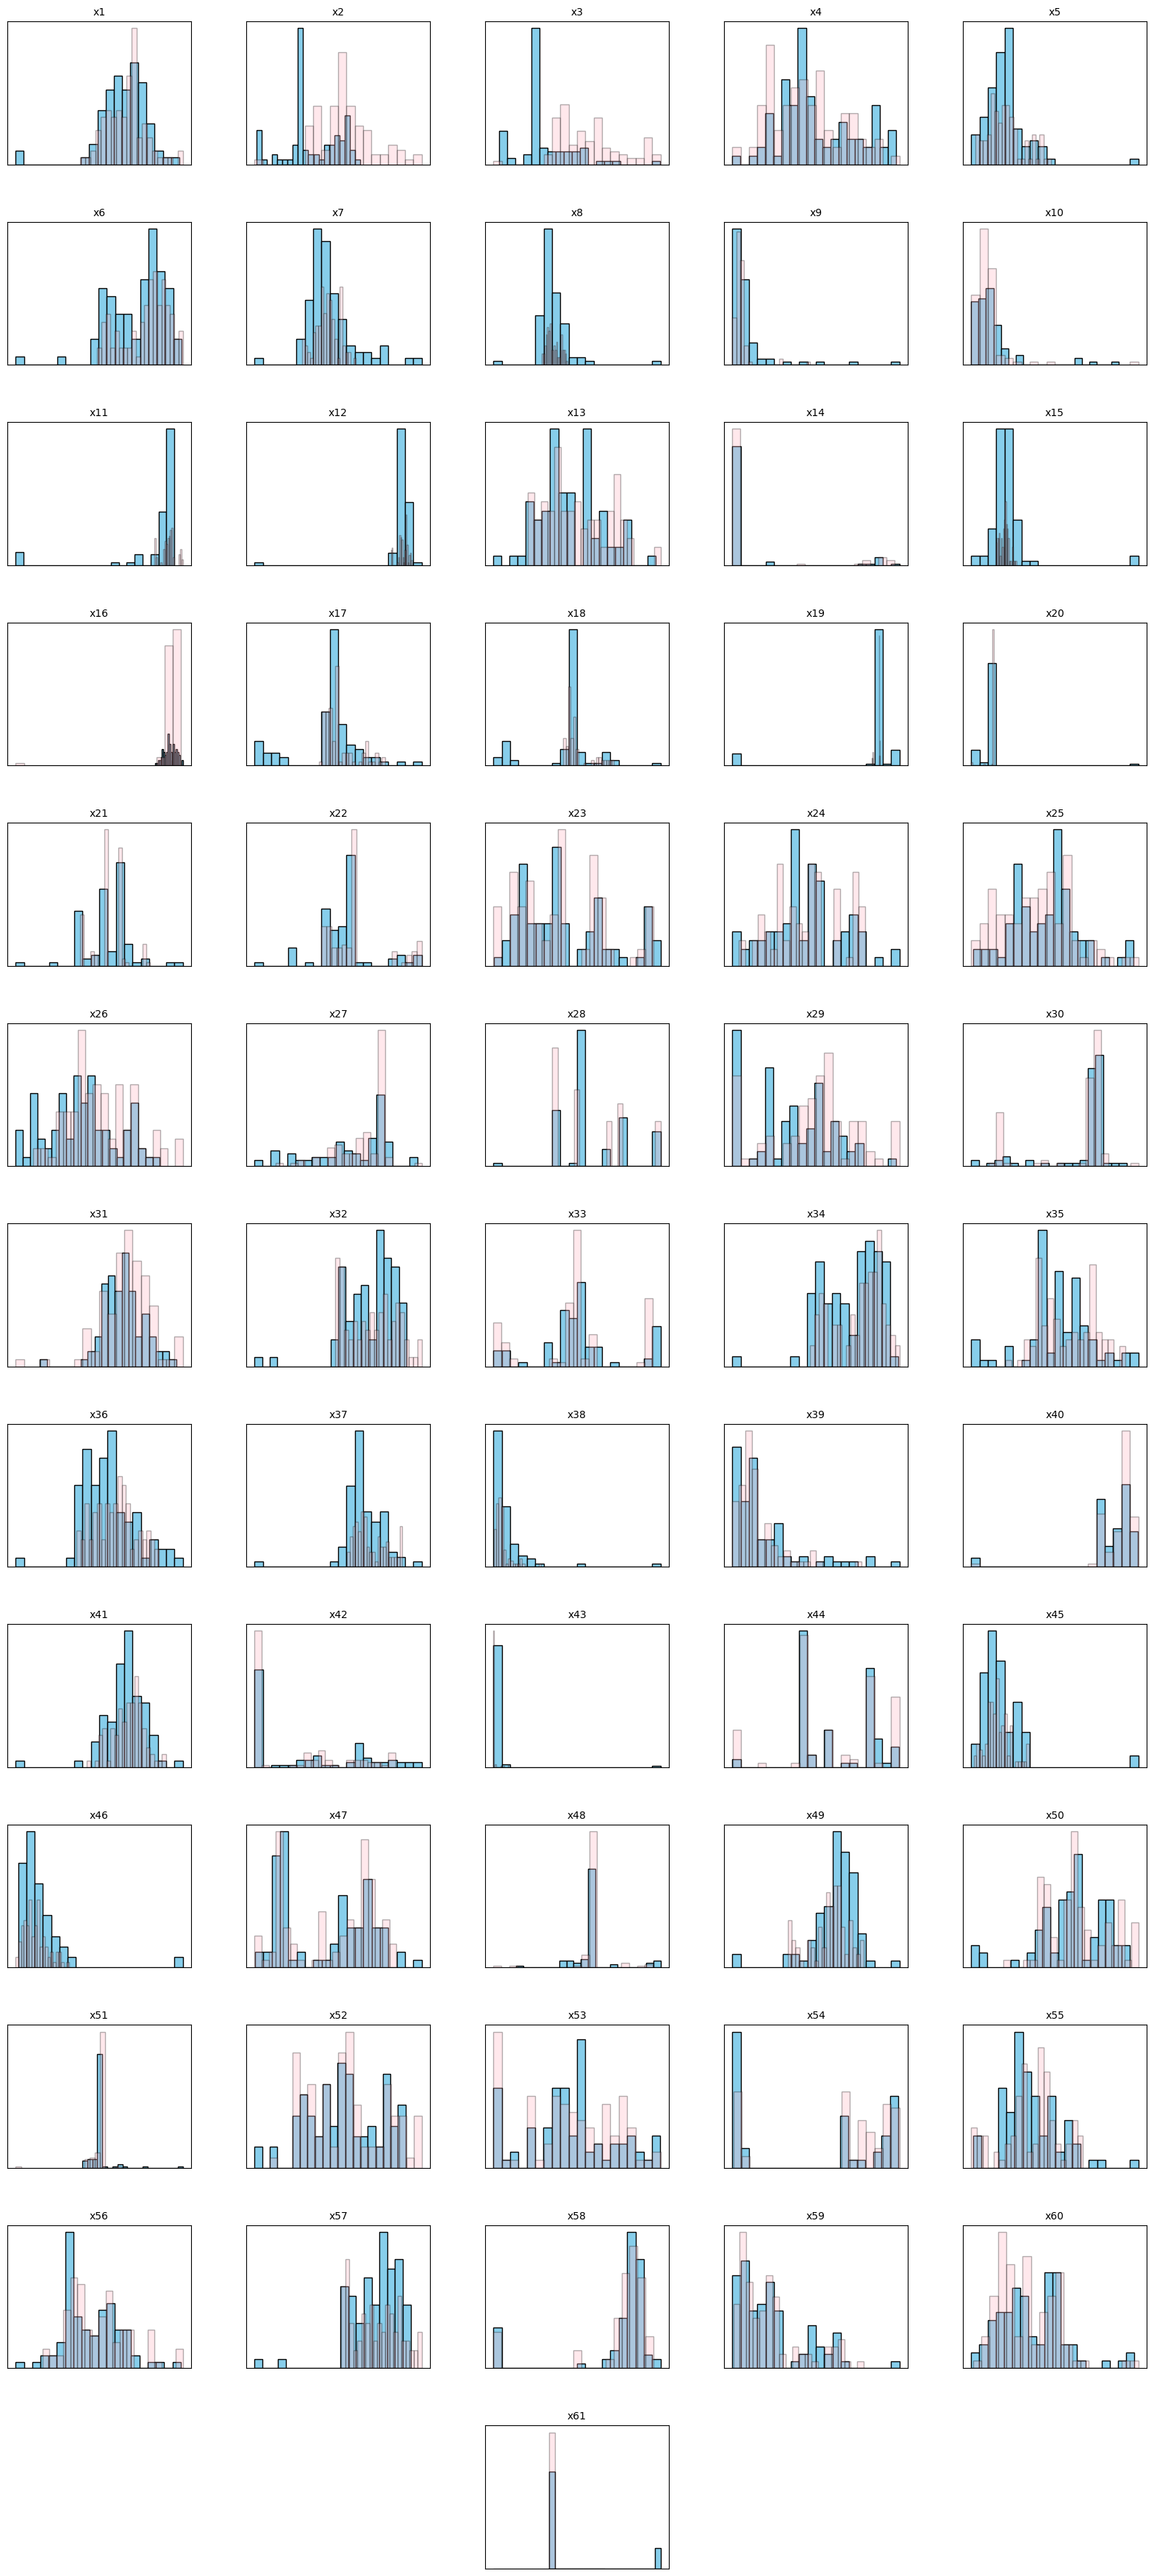

In [ ]:
rare_event_dates = train_set[train_set['y']==1]
not_rare_event_dates = train_set[train_set['y']==0].sample(frac=1)[:100]

# Creating a 5x13 grid
fig = plt.figure(figsize=(20, 45))
gs = gridspec.GridSpec(13, 5, wspace=0.3, hspace=0.4)

# Plotting histograms for each of the 65 features
for i in range(61):
    if i == 60:
      ax = fig.add_subplot(gs[i//5, i%5+2])
    else:
      ax = fig.add_subplot(gs[i//5, i%5])

    ax.hist(rare_event_dates[f'x{i+1}'], bins=20, color='skyblue', edgecolor='black')
    ax.hist(not_rare_event_dates[f'x{i+1}'], bins=20, color='lightpink', edgecolor='black', alpha=.3)
    ax.set_title(f'x{i+1}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.show()


#### Heatmap for Correlation Coeffecient Checking

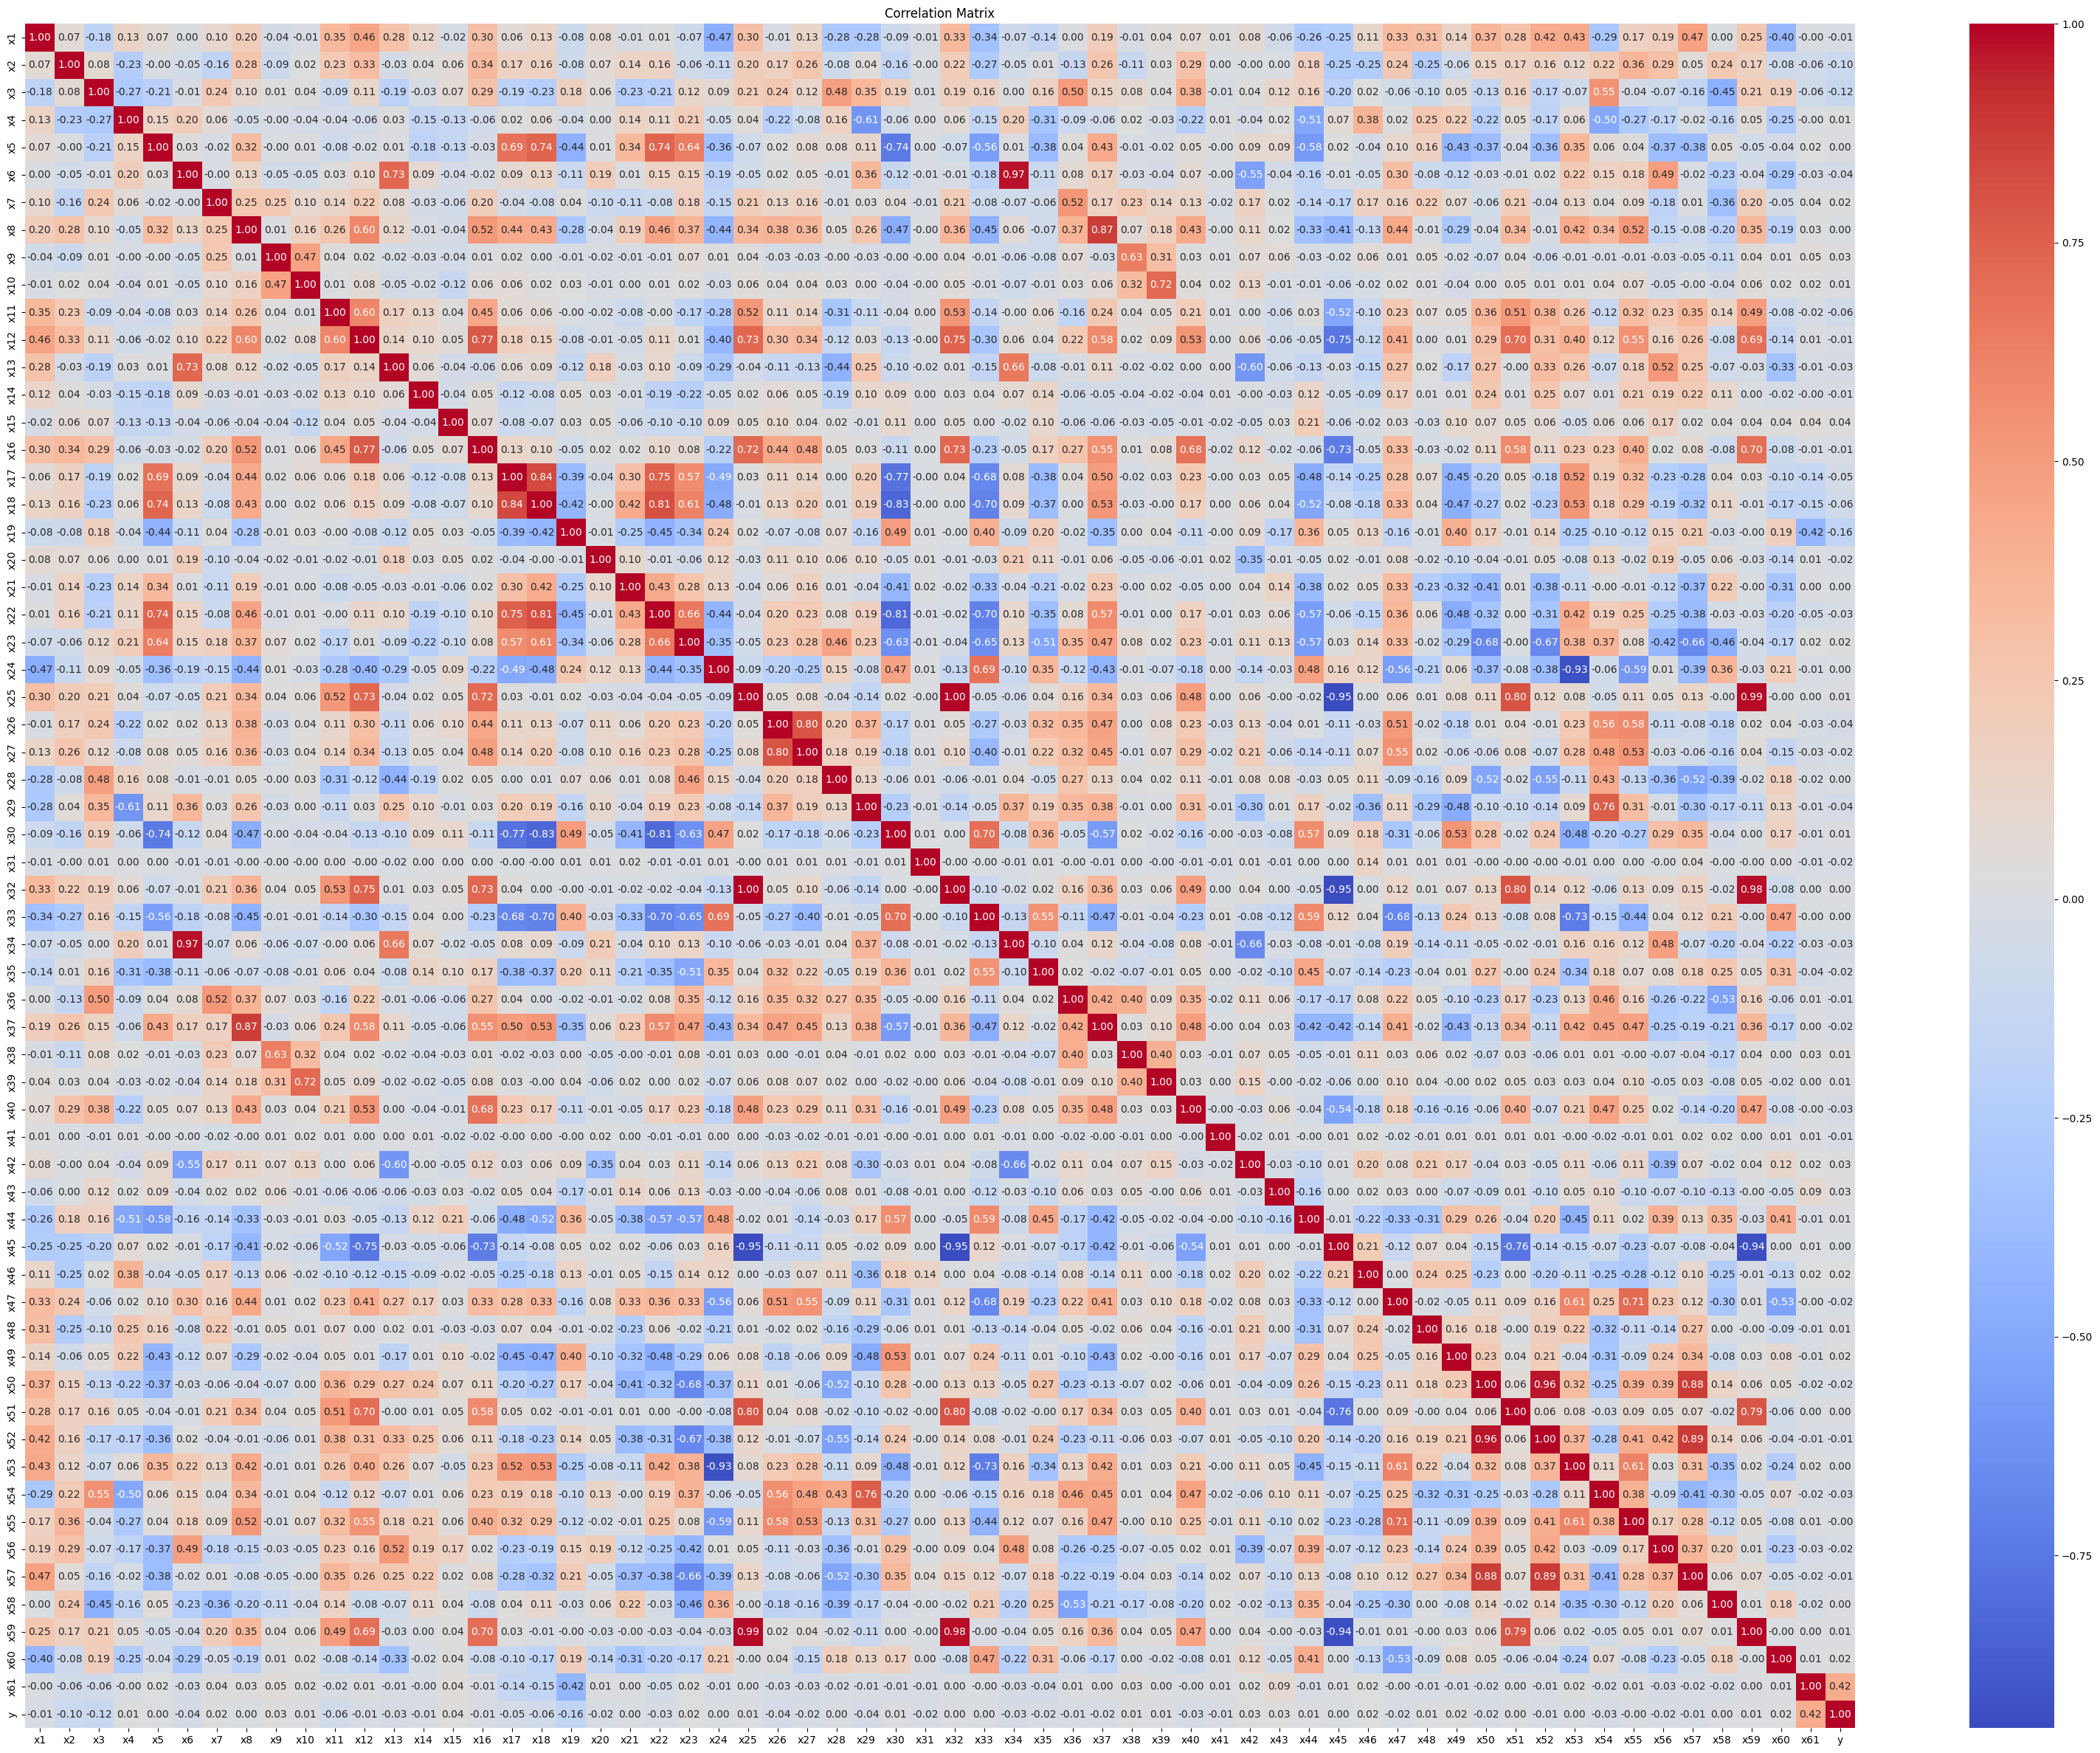

In [ ]:
correlation_matrix = train_set.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# correlation_matrix['y']



> While many features can be seen to be correlated to each other, none of them are correlated strongly to `y`.



Correlation of each feature with target attribute in descending order -

In [ ]:
correlation_matrix['y_ab'] = np.abs(correlation_matrix['y'])
correlation_matrix.sort_values(by='y_ab', ascending=False, inplace = True)
correlation_matrix['y'].head(n = 10)

,y
y,1.000000
x61,0.416543
x19,-0.158787
x3,-0.120824
x2,-0.100781
x18,-0.063689
x11,-0.057776
x17,-0.049171
x15,0.041336
x29,-0.037100


`Conclusion:` x19, x3 and x2 have relatively significant negative correlation coeffecient.

### Retaining Day of Week based on EDA

In [ ]:
train_set['dayOfWeek'] = train_set.index.dayofweek
train_set

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x54,x55,x56,x57,x58,x59,x60,x61,y,dayOfWeek
time,,,,,,,,,,,,,,,,,,,,,
1999-05-01 00:00:00,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0,0,5
1999-05-01 00:02:00,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0,0,5
1999-05-01 00:04:00,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0,0,5
1999-05-01 00:06:00,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0,0,5
1999-05-01 00:08:00,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-05-21 22:54:00,-0.577889,9.438876,2.380022,105.868994,1.136755,-0.872673,-0.099368,0.028915,-0.030057,-0.008280,...,2.638720,21.547306,-94.521613,1.642284,-0.007757,1.325701,0.000201,0,0,4
1999-05-21 22:56:00,-0.529320,9.253314,2.480383,102.992529,1.144430,-1.981010,-0.089298,0.038292,-0.030057,-0.008280,...,2.639208,27.107120,-97.970435,0.391002,-0.007842,0.872668,0.000199,0,0,4
1999-05-21 22:58:00,-0.597477,-8.815314,-9.687915,104.191473,1.152090,1.918984,-0.089298,0.038986,-0.029403,-0.008280,...,2.639696,13.019351,-100.109080,0.391002,-0.007926,0.182253,0.000197,1,1,4


### Removing certain attributes based on EDA

In [ ]:
to_drop = correlation_matrix[np.abs(correlation_matrix['y']) < .01].index
train_set_red = train_set.drop(labels=to_drop,axis = 1)
to_drop.shape

(20,)

### Removing Outliers
We do not want to remove data instances of positive class hence we will be seperating them


#### Method 1 : Outlier Count

In [ ]:
class_1_train_set = train_set_red[train_set_red['y'] == 1]
non_class_1_train_set = train_set_red[train_set_red['y'] != 1]

non_class_1_train_set = non_class_1_train_set.drop(axis=1, labels=['y'])

non_class_1_train_set.head()

,x1,x2,x3,x4,x6,x7,x9,x11,x12,x13,...,x48,x49,x50,x52,x54,x56,x57,x60,x61,dayOfWeek
time,,,,,,,,,,,,,,,,,,,,,
1999-05-01 00:00:00,0.376665,-4.596435,-4.095756,13.497687,-20.669883,0.000732,-0.059966,0.877951,-0.052959,-13.306135,...,0.084856,10.210182,11.295155,10.091721,-4.936434,18.515436,3.473400,0.006076,0,5
1999-05-01 00:02:00,0.475720,-4.542502,-4.018359,16.230659,-18.758079,0.000732,-0.059966,0.873273,-0.014244,-13.306135,...,0.085146,12.534340,11.290761,10.095871,-4.937179,22.760065,2.682933,0.006083,0,5
1999-05-01 00:04:00,0.363848,-4.681394,-4.353147,14.127997,-17.836632,0.010803,-0.030057,1.004910,0.065150,-9.619596,...,0.085436,18.582893,11.286366,10.100265,-4.937924,27.004663,3.537487,0.006090,0,5
1999-05-01 00:06:00,0.301590,-4.758934,-4.023612,13.161566,-18.517601,0.002075,-0.019986,0.930037,-0.067199,-15.196531,...,0.085726,17.719032,11.281972,10.104660,-4.938669,21.672449,3.986095,0.006097,0,5
1999-05-01 00:08:00,0.265578,-4.749928,-4.333150,15.267340,-17.505913,0.000732,-0.030057,0.828410,-0.018472,-14.609266,...,0.086016,16.855202,11.277577,10.109054,-4.939414,21.907251,3.601573,0.006105,0,5


##### Checking number of outliers per feature

In [ ]:
# Function to detect outliers using IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Loop through each feature and print the number of outliers
temp_df = pd.DataFrame(columns=['Feature', '#Outliers'])
for col in non_class_1_train_set.columns:
    num_outliers = count_outliers(non_class_1_train_set[col])
    temp_df.loc[len(temp_df)] = [col, num_outliers]

temp_df[ temp_df ['#Outliers'] > 1000 ]

,Feature,#Outliers
6,x9,1055
10,x14,2574
12,x17,2297
13,x18,2266
14,x19,4190
15,x20,1094
16,x22,2103
26,x38,1345
32,x48,2132
33,x49,1072


##### Trying to find a satisfactory threshold T

Removing all instances with outliers would reduce the dataset by `80%`, which was unacceptable. To address this, outlier removal is restricted to only the top 5% of instances with the most outliers, ensuring the dataset retains enough information while filtering significant noise. The strategy involves counting outliers for each data instance and setting a threshold `T`. If an instance has `T` or more outlier values, it is removed.  

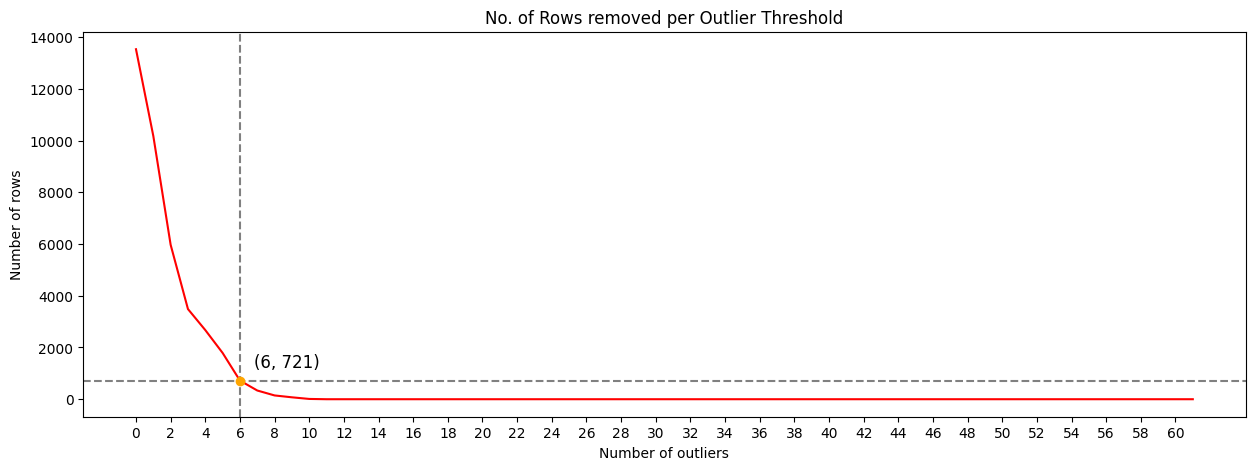

In [ ]:
Q1 = non_class_1_train_set.quantile(0.25)
Q3 = non_class_1_train_set.quantile(0.75)
IQR = Q3 - Q1

# Create boolean DataFrame indicating outliers (True = Outlier)
outliers = ((non_class_1_train_set < (Q1 - 1.5 * IQR)) | (non_class_1_train_set > (Q3 + 1.5 * IQR)))

# Count the number of outliers per row
outlier_count_per_row = outliers.sum(axis=1)

x = []
y = []
for i in range(62):
  x += [i]
  arr = outlier_count_per_row[outlier_count_per_row >= i]
  y += [arr.shape[0]]

plt.figure(figsize=(15,5))
plt.xticks(np.arange(min(x), max(x) + 1, 2))
plt.title("No. of Rows removed per Outlier Threshold")
plt.xlabel("Number of outliers")
plt.ylabel("Number of rows")
plt.plot(x,y, color='r');
plt.axhline(y=y[6], color='gray', linestyle='--')
plt.axvline(x=x[6], color='gray', linestyle='--');
plt.plot(x[6], y[6], 'o', color='orange')
plt.annotate(f"({x[6]}, {y[6]})", xy = (x[6], y[6]), fontsize=12, xytext=(x[6]+.8, y[6]+500) );


Hence we can conclude that we can remove rows with 6 or more outliers.

In [ ]:
outliers = outlier_count_per_row[outlier_count_per_row >= 65]
train_set_wo_outliers = train_set.drop(outliers.index)
print(f"Number of rows retained: {train_set_wo_outliers.shape[0]}")
train_set_wo_outliers.head()

Number of rows retained: 13617


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x54,x55,x56,x57,x58,x59,x60,x61,y,dayOfWeek
time,,,,,,,,,,,,,,,,,,,,,
1999-05-01 00:00:00,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0,0,5
1999-05-01 00:02:00,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0,0,5
1999-05-01 00:04:00,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0,0,5
1999-05-01 00:06:00,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0,0,5
1999-05-01 00:08:00,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0,0,5


#### Method 2 : Isolation Forest

In [ ]:
# Alternative Outlier Method
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.46, random_state=42)
outliers = iso_forest.fit_predict(non_class_1_train_set)

unique_elements, counts = np.unique(outliers, return_counts=True)
print(f"Number of outlier records removed: {counts[0]}\nNumber of records retained: {counts[1]}")
non_class_1_train_set_wo_outliers = non_class_1_train_set[(outliers==1)]
non_class_1_train_set_wo_outliers['y'] = 0

train_set_wo_outliers = pd.concat([class_1_train_set, non_class_1_train_set_wo_outliers])


rec_orig = train_set[train_set['y']==1].shape
rec_retained = train_set_wo_outliers[train_set_wo_outliers['y']==1].shape
print(f"Number of y=1 records retained before outlier removal: {rec_orig[0]}")
print(f"Number of y=1 records retained after outlier removal: {rec_retained[0]}")


Number of outlier records removed: 6224
Number of records retained: 7307
Number of y=1 records retained before outlier removal: 86
Number of y=1 records retained after outlier removal: 86


### Standardization

In [ ]:
y_actual = train_set_wo_outliers[['y']].reset_index()
df_feats = train_set_wo_outliers.drop(axis=1, labels=['y'])

scaler = StandardScaler()
scaled_df_feats = scaler.fit_transform(df_feats)

scaled_df = pd.DataFrame(scaled_df_feats, columns=df_feats.columns)
scaled_df = pd.merge(scaled_df, y_actual, left_index=True, right_index=True).set_index('time')

scaled_df

,x1,x2,x3,x4,x6,x7,x9,x11,x12,x13,...,x49,x50,x52,x54,x56,x57,x60,x61,dayOfWeek,y
time,,,,,,,,,,,,,,,,,,,,,
1999-05-01 08:38:00,1.439784,-2.729931,-1.886567,0.172030,0.311989,0.055197,-0.028110,0.343259,-0.344967,2.484598,...,-1.173155,1.238412,1.657072,-1.583269,0.308528,1.084487,1.580315,22.178067,0.936537,1
1999-05-02 04:02:00,-1.285555,-2.487502,-3.078113,-2.081729,0.623211,0.553060,0.507315,-0.389694,-1.124199,-0.499393,...,-1.083734,-0.207721,-0.279874,0.881939,-0.949695,0.358203,1.632439,-0.045090,1.441152,1
1999-05-02 06:24:00,-1.147202,-0.406027,0.575600,0.990771,-0.429456,0.803890,-1.158843,-0.266334,-0.276820,-0.986775,...,-0.773654,-0.564658,-0.635170,0.846154,-1.388992,-0.500674,1.602461,-0.045090,1.441152,1
1999-05-02 13:08:00,-1.300602,-0.082593,-0.321681,1.275257,0.094288,0.117899,-1.158843,-0.247014,-0.022274,-0.732230,...,-0.260933,-0.755875,-0.824643,0.889481,-1.140891,-1.028037,1.196270,-0.045090,1.441152,1
1999-05-02 20:42:00,-1.984651,-0.531970,0.014876,0.373294,0.255758,-1.065956,-1.158843,-0.337418,-0.518594,-0.621317,...,-1.124710,-0.755875,-0.824643,0.908406,-1.094831,-0.560944,0.896489,-0.045090,1.441152,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-05-21 16:34:00,0.567619,0.573258,-1.032675,0.832377,0.339677,-0.442665,0.976124,0.284639,0.921372,0.978527,...,-2.330306,0.000188,0.070501,0.215655,-1.136445,0.056853,-0.335586,-0.045090,0.431922,0
1999-05-21 16:40:00,0.523177,0.539526,-0.989009,0.825492,0.201987,-0.568093,0.726981,0.388355,0.885460,1.026851,...,-2.311543,-0.002153,0.072874,0.215776,-1.241406,-0.259594,-0.337206,-0.045090,0.431922,0
1999-05-21 16:44:00,0.584120,0.564950,-1.005475,0.818862,0.225362,-0.630795,0.474007,0.329270,0.758546,0.895492,...,-2.251085,-0.003670,0.074471,0.215856,-1.177083,-0.259594,-0.338017,-0.045090,0.431922,0


### Feature Reduction

#### Finding optimal number of PCs to retain

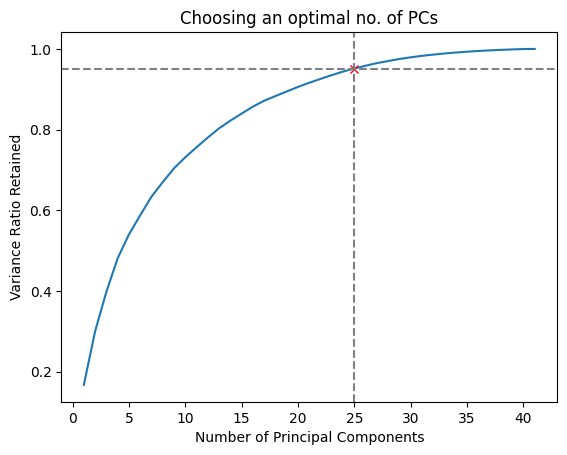

In [ ]:
# Find out good n_components for PCA
n_vals = []
num_of_col = []

for i in range(1,df_feats.shape[1]):
    num_of_col += [i]

    pca = PCA(n_components=i)
    pca.fit(scaled_df_feats)

    explained_variance = pca.explained_variance_ratio_
    n_vals += [np.sum(explained_variance)]

# Plot

plt.plot(num_of_col, n_vals);
plt.plot(num_of_col[24], n_vals[24], 'x', color='r', lw=2)
plt.axhline(y=0.95, color='gray', linestyle='--')
plt.axvline(x=25,color='gray', linestyle='--');
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio Retained')
plt.title('Choosing an optimal no. of PCs')
plt.show()


#### Calculating the Principal Components and Transforming Trainset

In [ ]:
pca = PCA(n_components=.95)
pca_scaled_feats = pca.fit_transform(scaled_df_feats)
explained_variance = pca.explained_variance_ratio_
cols = ['PC'+str(i) for i in range(pca_scaled_feats.shape[1])]
pca_df_feats = pd.DataFrame(pca_scaled_feats, columns=cols)
pca_df_feats.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,3.538152,-4.174114,-6.465239,1.053862,-12.689203,-0.769877,-7.692994,9.123490,-1.415092,-5.741948,...,2.308933,-3.070315,1.938421,-1.377883,2.120937,6.875789,-4.389304,1.072180,-3.097987,-2.122187
1,-0.145833,-1.396342,-1.325349,-2.349879,-0.155288,-1.513887,0.612742,2.424635,0.674478,1.532516,...,-0.395532,-2.333218,0.608796,-1.916689,-1.240555,0.326877,1.275999,0.321850,-0.651825,0.014383
2,-3.399944,-1.585644,-1.143794,0.794055,0.318896,-0.765481,1.347001,1.402291,-0.969288,-1.412222,...,0.197378,0.921788,0.588455,-0.303733,0.278125,0.188827,0.545394,-0.087125,0.044704,-0.120216
3,-2.946566,-1.095999,-1.231590,-0.685774,0.005942,-0.082937,1.453830,2.254125,-0.581940,-1.321882,...,0.015432,0.741137,0.758346,0.021378,0.506140,0.085106,0.492431,0.109263,1.002985,-0.949993
4,-3.698691,-0.299229,-1.076252,-0.945799,0.710451,0.246974,1.489008,2.914033,-0.568647,-0.828193,...,0.757148,0.019034,0.396755,-0.220938,0.055267,0.516453,-0.005564,-0.517342,1.172011,0.151090


In [ ]:
pca_df_feats.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
count,7.393000e+03,7.393000e+03,7393.000000,7.393000e+03,7.393000e+03,7.393000e+03,7393.000000,7.393000e+03,7.393000e+03,7.393000e+03,...,7.393000e+03,7.393000e+03,7.393000e+03,7.393000e+03,7.393000e+03,7393.000000,7393.000000,7.393000e+03,7.393000e+03,7.393000e+03
mean,6.151053e-17,-3.075527e-17,0.000000,-1.537763e-17,-3.075527e-17,7.688816e-17,0.000000,3.075527e-17,3.075527e-17,3.075527e-17,...,-8.073257e-17,-3.844408e-17,1.729984e-17,2.306645e-17,-1.537763e-17,0.000000,0.000000,-6.151053e-17,-3.844408e-17,3.459967e-17
std,2.650217e+00,2.361288e+00,2.028139,1.868087e+00,1.574534e+00,1.413811e+00,1.390575,1.232436e+00,1.199339e+00,1.072969e+00,...,8.494247e-01,7.850106e-01,6.968543e-01,6.899619e-01,6.886370e-01,0.657027,0.635765,6.268521e-01,6.095542e-01,5.620846e-01
min,-8.443181e+00,-1.779088e+01,-8.504058,-1.741328e+01,-2.223261e+01,-1.949425e+01,-55.516242,-7.382021e+00,-2.324156e+01,-5.741948e+00,...,-1.088108e+01,-6.880418e+00,-6.212060e+00,-8.996918e+00,-9.284305e+00,-11.240827,-4.801322,-9.335713e+00,-3.255162e+00,-8.964680e+00
25%,-2.656889e+00,-1.579258e+00,-1.439302,-1.346881e+00,-7.772753e-01,-8.517518e-01,-0.639141,-7.472758e-01,-5.005437e-01,-7.864362e-01,...,-4.598617e-01,-5.170369e-01,-3.301919e-01,-3.953995e-01,-3.895987e-01,-0.346745,-0.384022,-3.362994e-01,-3.272182e-01,-3.971519e-01
50%,9.149193e-01,1.655811e-01,-0.702559,-2.286848e-01,7.121206e-02,1.373609e-01,0.077465,1.078647e-01,-7.911544e-02,-3.688347e-02,...,2.953354e-02,-2.918342e-03,4.241416e-02,1.770637e-02,5.548555e-02,-0.004051,0.004641,1.670533e-02,1.207403e-02,-2.644787e-03
75%,2.194632e+00,1.767135e+00,1.339359,1.308184e+00,7.692005e-01,8.705903e-01,0.787983,6.148733e-01,3.744991e-01,6.686720e-01,...,4.281285e-01,4.731645e-01,3.937949e-01,4.490088e-01,3.949544e-01,0.360115,0.356825,3.508747e-01,3.625249e-01,3.835339e-01
max,4.910281e+00,5.823171e+00,6.911077,8.696734e+00,7.553716e+00,4.100560e+00,1.745272,2.870086e+01,2.804100e+01,1.804844e+01,...,6.305094e+00,8.853875e+00,1.274665e+01,7.159356e+00,6.371445e+00,11.607031,4.653509,6.657332e+00,8.368265e+00,7.008441e+00


In [ ]:
pca_df = pd.merge(pca_df_feats, y_actual, how='inner', left_index=True, right_index=True)
pca_df = pca_df.set_index('time')
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,y
time,,,,,,,,,,,,,,,,,,,,,
1999-05-01 08:38:00,3.538152,-4.174114,-6.465239,1.053862,-12.689203,-0.769877,-7.692994,9.123490,-1.415092,-5.741948,...,-3.070315,1.938421,-1.377883,2.120937,6.875789,-4.389304,1.072180,-3.097987,-2.122187,1
1999-05-02 04:02:00,-0.145833,-1.396342,-1.325349,-2.349879,-0.155288,-1.513887,0.612742,2.424635,0.674478,1.532516,...,-2.333218,0.608796,-1.916689,-1.240555,0.326877,1.275999,0.321850,-0.651825,0.014383,1
1999-05-02 06:24:00,-3.399944,-1.585644,-1.143794,0.794055,0.318896,-0.765481,1.347001,1.402291,-0.969288,-1.412222,...,0.921788,0.588455,-0.303733,0.278125,0.188827,0.545394,-0.087125,0.044704,-0.120216,1
1999-05-02 13:08:00,-2.946566,-1.095999,-1.231590,-0.685774,0.005942,-0.082937,1.453830,2.254125,-0.581940,-1.321882,...,0.741137,0.758346,0.021378,0.506140,0.085106,0.492431,0.109263,1.002985,-0.949993,1
1999-05-02 20:42:00,-3.698691,-0.299229,-1.076252,-0.945799,0.710451,0.246974,1.489008,2.914033,-0.568647,-0.828193,...,0.019034,0.396755,-0.220938,0.055267,0.516453,-0.005564,-0.517342,1.172011,0.151090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-05-21 16:34:00,-0.678585,2.756831,4.686836,-0.637367,3.937848,-1.989827,-1.165736,0.659428,1.088481,0.492632,...,0.259410,0.105251,-0.347823,0.110428,0.655377,-0.971555,0.126395,0.941970,0.061676,0
1999-05-21 16:40:00,-0.916157,2.889554,4.786386,-0.743174,4.164506,-2.250233,-1.323926,0.505911,1.298877,0.429683,...,0.089377,0.152599,-0.012777,-0.150742,0.577306,-0.870035,-0.199006,0.949569,-0.130827,0
1999-05-21 16:44:00,-0.783442,2.935397,4.569699,-0.801470,4.328330,-2.165897,-1.141148,0.584931,0.960098,0.519572,...,0.528959,0.204023,0.376504,-0.387365,0.411371,-0.506020,0.147935,0.389343,-0.473565,0


#### Explained Variance of PCs

The explained variance of the first 3 PCs are:  0.17 + 0.13 + 0.1 for a total sum of: 0.4 



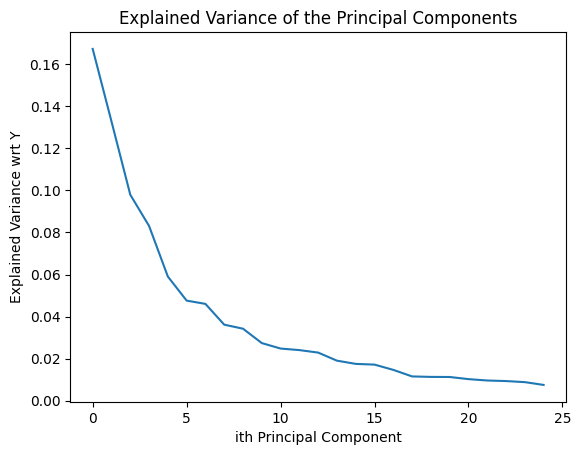

In [ ]:
plt.plot(explained_variance);
plt.title("Explained Variance of the Principal Components");
plt.xlabel("ith Principal Component");
plt.ylabel("Explained Variance wrt Y");

s = explained_variance[0] + explained_variance[1] + explained_variance[2]
print("The explained variance of the first 3 PCs are: ", round(explained_variance[0],2),"+",round(explained_variance[1],2),"+",round(explained_variance[2],2),
      "for a total sum of:", round(s,2), "\n")

#### Scatter Plot based on the two most important PCs

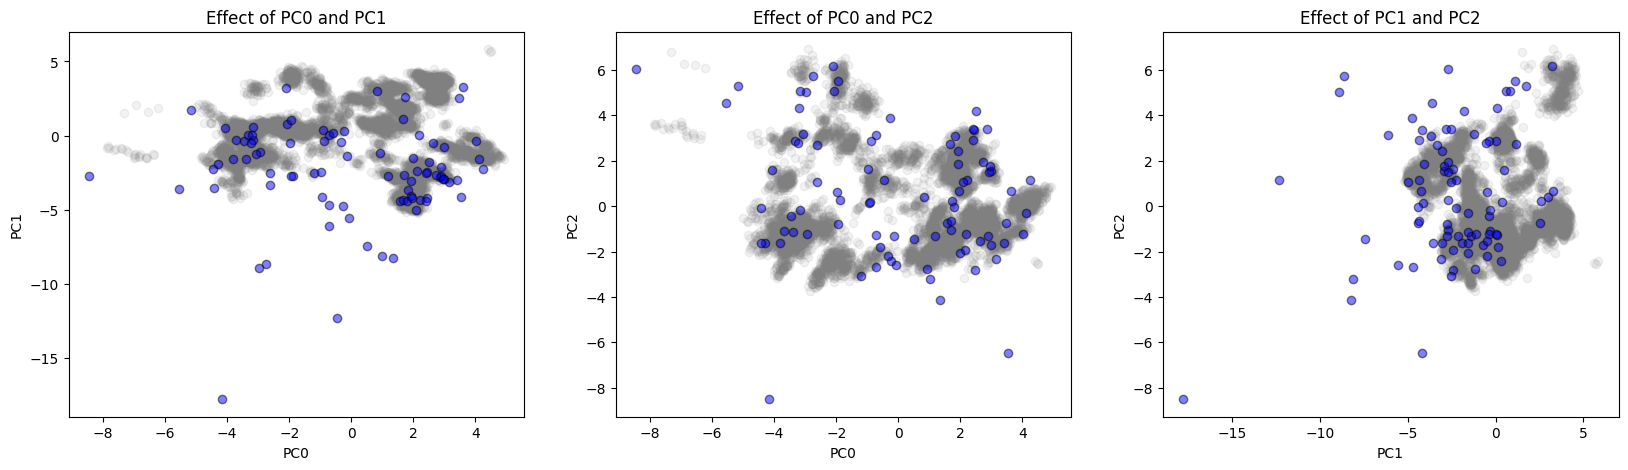

In [ ]:
plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,3,1)
ax1.set_xlabel("PC0")
ax1.set_ylabel("PC1")
ax1.scatter(pca_df[pca_df['y']==0]['PC0'], pca_df[pca_df['y']==0]['PC1'] ,color='gray', alpha=0.1);
ax1.scatter(pca_df[pca_df['y']==1]['PC0'], pca_df[pca_df['y']==1]['PC1'], color='blue', alpha=0.5, edgecolor='black',);
ax1.set_title("Effect of PC0 and PC1");

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel("PC0")
ax2.set_ylabel("PC2")
ax2.scatter(pca_df[pca_df['y']==0]['PC0'], pca_df[pca_df['y']==0]['PC2'] ,color='gray', alpha=0.1);
ax2.scatter(pca_df[pca_df['y']==1]['PC0'], pca_df[pca_df['y']==1]['PC2'], color='blue', alpha=0.5, edgecolor='black',);
ax2.set_title("Effect of PC0 and PC2");

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel("PC1")
ax3.set_ylabel("PC2")
ax3.scatter(pca_df[pca_df['y']==0]['PC1'], pca_df[pca_df['y']==0]['PC2'] ,color='gray', alpha=0.1);
ax3.scatter(pca_df[pca_df['y']==1]['PC1'], pca_df[pca_df['y']==1]['PC2'], color='blue', alpha=0.5, edgecolor='black',);
ax3.set_title("Effect of PC1 and PC2");

In [ ]:
import plotly.express as px
# Create an interactive 3D scatter plot

sample_df = pca_df.sample(frac=1)
tdf1 = sample_df.loc[df['y'] == 1]
tdf2 = sample_df.loc[df['y'] == 0][:500]

pca_df1 = pd.concat([tdf1, tdf2])

color_map = {1: 'rgba(255, 0, 0, 0.1)', 0: 'rgba(0, 0, 255, 0.1)'}
pca_df1['color'] = pca_df1['y'].map(color_map)


fig = px.scatter_3d(
    pca_df1, x='PC0', y='PC1', z='PC2', color='color',
    title='Visualizing the spread of y=1 and y=0 wrt PC0, PC1 and PC2',
    size_max=10
)

fig.show();

## Handle Class Imbalance
There still exists a huge disparity in class labels to handle that we will be adopting ADASYN or SMOTE

In [ ]:
pca_df['y'].value_counts()

,count
y,
0,7307
1,86


##### SMOTE

In [ ]:
def smote(X, y, ss):
  # Apply SMOTE to the entire dataset
  smote = SMOTE(sampling_strategy = ss, random_state=0)
  X_resampled, y_resampled = smote.fit_resample(X, y)

  return (X_resampled, y_resampled)

##### ADASYN

In [ ]:
def adasyn(X, y):
    # Apply ADASYN to the dataset
    adasyn = ADASYN(random_state=0)
    X_resampled, y_resampled = adasyn.fit_resample(X, y)

    return X_resampled, y_resampled

##### Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

def rus(X, y):
    # Apply RUS to the dataset
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(X, y)

    return X_resampled, y_resampled


##### Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks

def tomek_links(X, y):
    # Apply Tomek Links to the dataset
    tomek = TomekLinks()
    X_resampled, y_resampled = tomek.fit_resample(X, y)

    return X_resampled, y_resampled


##### Tomek Links followed by SMOTE

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter
def tomek_and_smote(X,y, ss):
  # print("The number of samples in train set before smote: ", y.shape[0])
  # Oversampling the train dataset using SMOTE + Tomek
  smtom = SMOTETomek(random_state=139, sampling_strategy=ss)
  X_resampled, y_resampled = smtom.fit_resample(X,y)
  print("The number of samples in train set after smote: ", y_resampled.shape[0])
  return X_resampled, y_resampled


## Classification

### Preparing the Test dataset

In [ ]:
def prepare(test_x, iso_forest, y_test):
    # Adding Date and Time Features
    test_x['dayOfWeek'] = test_x.index.dayofweek
    test_x_red = test_x.drop(axis=1, labels=to_drop)

    # Step 1: Detect and Remove Outliers using Isolation Forest
    # Separate y=0 cases - Wrong way
    test_x_class0 = test_x_red.loc[y_test[y_test['y']==0].index]
    test_x_class1 = test_x_red.loc[y_test[y_test['y']==1].index]

    outliers = iso_forest.predict(test_x_class0)
    test_x_class0_clean = test_x_class0[outliers != -1]
    test_x_clean = pd.concat([test_x_class1, test_x_class0_clean])
    y_test = y_test.loc[test_x_clean.index]

    smote = SMOTE(sampling_strategy = {0:4413, 1:40}, random_state=0)
    test_x_clean, y_test = smote.fit_resample(test_x_clean, y_test)

    # Actual way
    # outliers = iso_forest.predict(test_x)
    # test_x_clean = test_x[outliers != -1]
    # y_test = y_test.loc[test_x_clean.index]

    # Step 2: Standardization
    scaler = StandardScaler()
    scaled_test_x = scaler.fit_transform(test_x_clean)

    # Step 3: PCA Transformation
    pca_scaled_test_x = pca.transform(scaled_test_x)
    cols = ['PC' + str(i) for i in range(pca_scaled_test_x.shape[1])]
    pca_test_x = pd.DataFrame(pca_scaled_test_x, columns=cols)

    # Use if PCA and Isolation Forest reqd
    return pca_test_x, y_test
    # Use if pca only needed
    return pca_test_x
    # Use if standardization needed only
    return scaled_test_x

### Plotting Area Under Precision Recall Curve

In [ ]:
# Function to plot the Area Under Precision-Recall Curve with a baseline
def plot_auprc_with_baseline(y_true, y_scores):
    # Calculate Precision, Recall, and AUPRC
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auprc = auc(recall, precision)

    # Calculate the baseline (which is the proportion of positive samples)
    baseline_precision = sum(y_true) / len(y_true)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(4, 4))
    plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}', color='b', linewidth=2)

    # Add a horizontal line representing the baseline precision
    plt.axhline(y=baseline_precision, color='gray', linestyle='--', label=f'Baseline Precision = {baseline_precision:.2f}')

    # Formatting the plot
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve with Baseline')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

### Train and Evaluate Model

In [ ]:
# Function to calculate and print evaluation metrics
def train_and_evaluate_model(model,X_resampled, y_resampled, X_scaled_test, y_test):

    # Train model
    model.fit(X_resampled, y_resampled['y'])
    # Make predictions
    y_pred = model.predict(X_scaled_test)
    # Calculate evaluation metrics
    cm = confusion_matrix(y_test, y_pred)

    # Plot using seaborn heatmap
    # plt.figure(figsize=(3, 3))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False )

    # Add labels, title and axes

    # plt.xlabel('Predicted Labels')
    # plt.ylabel('True Labels')
    # plt.title('Confusion Matrix')
    # plt.show()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Display evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    average_precision = average_precision_score(y_test, y_pred)
    precision_, recall_, _ = precision_recall_curve(y_test, y_pred)
    auprc = auc(recall_, precision_)
    print("AUPRC:", auprc)
    print("----")
    # plot_auprc_with_baseline(y_test, y_pred)
    return f1, recall, precision



### XGBoost, Balanced Random Forest and LightGBM

In [ ]:
# Applying OverSampling or Undersampling
y = pca_df[['y']]
X = pca_df.drop(axis=1, labels=['y'])

y.value_counts()

,count
y,
0,7307
1,86


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
import warnings
f1s = []
rs = []
ps = []
iz = []
warnings.filterwarnings("ignore")
for i in range(100,y.value_counts()[0],500):
    X_test_proc, y_test_proc = prepare(X_test, iso_forest, y_test)
    ss = {0:y.value_counts()[0] , 1:i}
    X_resampled, y_resampled = tomek_and_smote(X,y,ss)

    models = {
              "XGBoost": XGBClassifier( eval_metric='aucpr' ,
                                        scale_pos_weight=ss[0]/ss[1],
                                        learning_rate= 0.3),
              "LightGBM": LGBMClassifier(objective='binary',metric='auprc',verbose=-1, scale_pos_weight=ss[0]/ss[1]),
              "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=200, random_state=42),
              }
    iz += [i]


    for model_name, model in models.items():
        print(f"Training: {model_name}")
        f1, r, p = train_and_evaluate_model( model, X_resampled, y_resampled, X_test_proc, y_test_proc['y'])
        f1s += [f1]
        rs += [r]
        ps += [p]

The number of samples in train set after smote:  7403
Training: XGBoost
Accuracy: 0.998428026049854
Precision: 1.0
Recall: 0.825
F1 Score: 0.9041095890410958
AUPRC: 0.9132859869750729
----
Training: LightGBM
Accuracy: 0.9973051875140355
Precision: 0.868421052631579
Recall: 0.825
F1 Score: 0.8461538461538461
AUPRC: 0.8474965132908624
----
Training: Balanced Random Forest
Accuracy: 0.9128677296204806
Precision: 0.09154929577464789
Recall: 0.975
F1 Score: 0.16738197424892703
AUPRC: 0.5333869317409058
----
The number of samples in train set after smote:  7907
Training: XGBoost
Accuracy: 0.9905681562991242
Precision: 0.4838709677419355
Recall: 0.75
F1 Score: 0.5882352941176471
AUPRC: 0.6180583224067863
----
Training: LightGBM
Accuracy: 0.9849539636200314
Precision: 0.3516483516483517
Recall: 0.8
F1 Score: 0.48854961832061067
AUPRC: 0.5767224466528307
----
Training: Balanced Random Forest
Accuracy: 0.9743992813833371
Precision: 0.25
Recall: 0.925
F1 Score: 0.39361702127659576
AUPRC: 0.587836

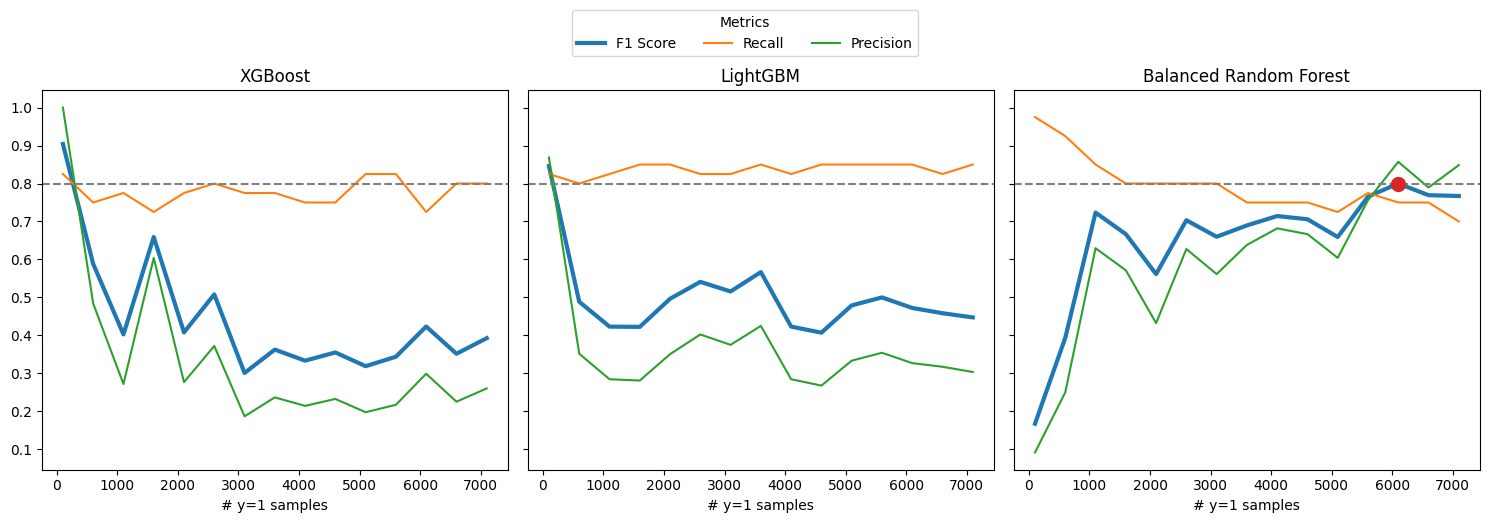

In [ ]:

fig,ax = plt.subplots(1,3, figsize=(15,5), sharey=True)

ax[0].set_title('XGBoost')
ax[0].set_xlabel('# y=1 samples')
line1, = ax[0].plot(iz, f1s[0::3], label='F1 Score', lw=3)
line2, = ax[0].plot(iz, rs[0::3], label='Recall')
line3, = ax[0].plot(iz, ps[0::3], label='Precision')
ax[0].axhline(y=0.8, color='gray', linestyle='--')

ax[0].set_yticks(np.arange(0,1.1,0.1))

ax[1].set_title('LightGBM')
ax[1].set_xlabel('# y=1 samples')
ax[1].plot(iz, f1s[1::3], label='F1 Score', lw=3)
ax[1].plot(iz, rs[1::3], label='Recall')
ax[1].axhline(y=0.8, color='gray', linestyle='--')
ax[1].plot(iz, ps[1::3], label='Precision')

ax[2].set_title('Balanced Random Forest')
ax[2].set_xlabel('# y=1 samples')
ax[2].plot(iz, f1s[2::3], label='F1 Score', lw=3)
ax[2].plot(iz, rs[2::3], label='Recall')
ax[2].plot(iz, ps[2::3], label='Precision')
ax[2].axhline(y=0.8, color='gray', linestyle='--')
ax[2].plot(iz[12], f1s[2+3*12], marker = 'o', lw = 5, markersize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])

fig.legend(handles=[line1, line2, line3], loc='upper center',
           fontsize='medium', title='Metrics',  bbox_to_anchor=(0.5, 1.05), ncol=4);



### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid, scoring='f1')
grid.fit(X_resampled, y_resampled)
best_model = grid.best_estimator_

y_probs = best_model.predict_proba(X_test_proc)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test_proc['y'], y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Find the threshold with the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]



print("Optimal Threshold:", optimal_threshold)
print("Optimal F1 Score:", optimal_f1)

# You can also print the corresponding precision and recall at this threshold
print("Precision at Optimal Threshold:", precisions[optimal_idx])
print("Recall at Optimal Threshold:", recalls[optimal_idx])

Optimal Threshold: 0.9907912496884527
Optimal F1 Score: 0.8732394317000597
Precision at Optimal Threshold: 1.0
Recall at Optimal Threshold: 0.775


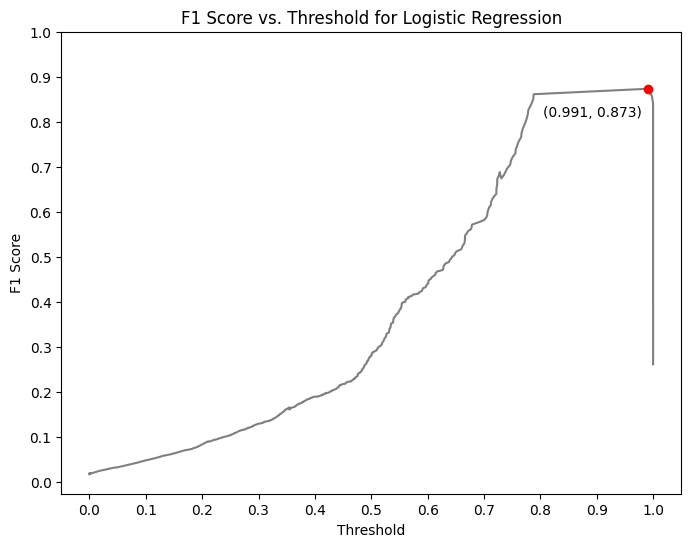

In [ ]:

# Plot F1 scores against thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], color="gray")
plt.plot(optimal_threshold, optimal_f1, marker='o', color='red')

# Label the optimal point
plt.annotate(f'({optimal_threshold:.3f}, {optimal_f1:.3f})',
             (optimal_threshold, optimal_f1),
             textcoords="offset points",
             xytext=(-40,-20),
             ha='center',
             color='black')
plt.xticks(np.arange(0, 1.1, 0.1))  # Adjust range as necessary
plt.yticks(np.arange(0, 1.1, 0.1))

# Customize the plot
plt.title("F1 Score vs. Threshold for Logistic Regression")
plt.xlabel("Threshold")
plt.ylabel("F1 Score");